In [142]:
from astropy.io import fits
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from photutils import CircularAperture
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import aperture_photometry
import numpy as np

In [143]:
ImageOne = 'dayonebinary.fits'
ImageTwo = 'daytwobinary.fits'
ImageThree = 'daythreebinary.fits'

In [144]:
hdu_list = fits.open(ImageOne)
image_data_one = hdu_list[0].data
mean, median, std = sigma_clipped_stats(image_data_one, sigma=3.0, iters=5) 
daofind = DAOStarFinder(fwhm=5.0, threshold=5.*std)
sources_one = daofind(image_data_one - median)
Date_1 = hdu_list[0].header['MJD-OBS']
print(Date_1)
print(sources_one)

49552.2999131944
 id   xcentroid     ycentroid   ...   peak       flux          mag     
--- ------------- ------------- ... ------- ------------- -------------
  1 254.293381783 996.777197412 ... 60587.0 2766.55458295 -8.6048481077


In [145]:
hdu_list.close()
hdu_list = fits.open(ImageTwo)
image_data_two = hdu_list[0].data
mean, median, std = sigma_clipped_stats(image_data_two, sigma=3.0, iters=5) 
daofind = DAOStarFinder(fwhm=5.0, threshold=5.*std)
sources_two = daofind(image_data_two - median)
Date_2 = hdu_list[0].header['MJD-OBS']
print(Date_2)
print(sources_two)

49553.2999131944
 id   xcentroid     ycentroid   ...   peak       flux          mag      
--- ------------- ------------- ... ------- ------------- --------------
  1 254.345709192 996.868787248 ... 16018.0 721.366277788 -7.14538959047


In [146]:
hdu_list.close()
hdu_list = fits.open(ImageThree)
image_data_three = hdu_list[0].data
mean, median, std = sigma_clipped_stats(image_data_three, sigma=3.0, iters=5) 
daofind = DAOStarFinder(fwhm=5.0, threshold=5.*std)
sources_three = daofind(image_data_three - median)
Date_3 = hdu_list[0].header['MJD-OBS']
print(Date_3)
print(sources_three)

49554.2999131944
 id   xcentroid     ycentroid   ...   peak       flux          mag     
--- ------------- ------------- ... ------- ------------- -------------
  1 254.293381783 996.777197412 ... 60587.0 2766.55458295 -8.6048481077


In [147]:
magnitude_one = (sources_one['mag'])
magnitude_two = (sources_two['mag'])
magnitude_three = (sources_three['mag'])
mag_difference = (magnitude_one - magnitude_two)
print(mag_difference)

     mag      
--------------
-1.45945851723


In [148]:
if (mag_difference)**2 < 0.5:
    print ('no variable objects')
else:
    print ('binary star')    

binary star


In [149]:
hdu_list.info()

Filename: daythreebinary.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     583   (510, 2010)   uint32   


In [150]:
header = hdu_list['PRIMARY'].header

In [151]:
hdu_list[0].header['MJD-OBS']

49554.2999131944

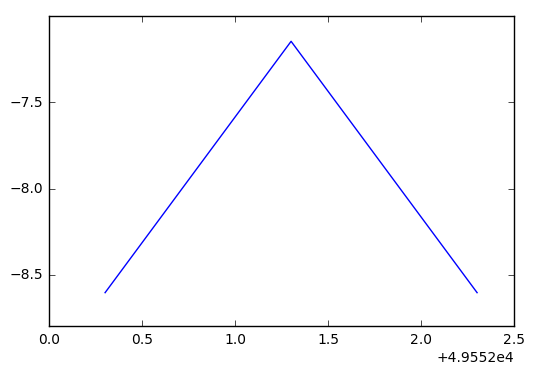

In [152]:
x = [magnitude_one, magnitude_two, magnitude_three]
y = [Date_1, Date_2, Date_3]
plt.plot(y,x)
plt.show()

In [116]:
T = Date_2 - Date_1
print('period =', T)

period = 1.0
